# Data Wrangling Project

#### In this project I will wrangle and analyze the tweet archive of Twitter user @dog_rates. @dog_rates that rates people's dogs with a some tweet about the dog. These ratings almost always have a denominator of 10. @dog_rates asks people to send photos of their dogs which are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".

## DataSet
- The First Dataset is a csv file which we need to access it by dounloading it
- The Second Dataset is a  tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- The Third Dataset is need to be access using twitter API in and save in a file in json format after that it need to be converted to dataframe

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tweepy'

In [5]:
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:

#import the tweet image predictions using requests library#import 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
df2 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [69]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
#add tweets to tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 736


In [9]:
#append the tweets to a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
json_tweets=pd.DataFrame()

In [11]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

# Assess
## After gathering each of the above pieces of data, I assessed them visually and programmatically for quality and tidiness issues.

In [12]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8532,38588
1,892177421306343426,6270,33086
2,891815181378084864,4156,24912
3,891689557279858688,8660,42009
4,891327558926688256,9411,40140
5,891087950875897856,3115,20128
6,890971913173991426,2073,11797
7,890729181411237888,18907,65209
8,890609185150312448,4270,27667
9,890240255349198849,7427,31787


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31219 entries, 0 to 31218
Data columns (total 3 columns):
id                31219 non-null int64
retweet_count     31219 non-null int64
favorite_count    31219 non-null int64
dtypes: int64(3)
memory usage: 731.8 KB


In [18]:
df.tweet_id.duplicated().sum()

0

In [19]:
df2.tweet_id.duplicated().sum()

0

In [20]:
df2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
#check duplicates ids in json tweets
sum(json_tweets.id.duplicated())

28876

## Quality

### Df Dataframe


- Text column should not have links
- Timestamp column is in string
- missing name of the dogs
- dog's name are wrong
- The rating_denominator should not be more than 10
- text column should not start with RT @dogs: 
- "&amp" characters present in text

## Df2 DataFrame

- The predicted breed of dogs should be in capital letter

# tidiness

- json_tweet column name id should be changed to tweet_id to align it to other
- column name timestamp should be named tweet_timestamp
- duplicate data on json_tweet dataframe
- merger of all the dataframe

# Clean

In [23]:
#creating the duplicate file 
df_clean=df.copy()
df2_clean=df2.copy()
json_tweets_clean=json_tweets.copy()

### df: Text column should not have links

#### Define: Link should be removed from text column

### code

In [24]:
#create a regex pattern in order to define the URLs that are present in the text column
link =r"Http:/S+"

In [25]:
clean=[]
#loop for cleaning text column
for l in df['text']:
    clean.append(re.sub(link,'',l))
df_clean['text']=clean

### Test

In [26]:
df['text'][1445]

'Oh my god 10/10 for every little hot dog pupper'

### df: timestamp in string

#### Define: timestamp from string to date

### code

In [27]:
date=[]
for d in df['timestamp']:
        date.append(datetime.strptime(d, "%Y-%m-%d %H:%M:%S +0000").date())
df_clean.timestamp=date

### Test

In [28]:
df_clean.timestamp.sample(4)

1862    2015-12-11
1202    2016-04-03
1199    2016-04-04
90      2017-06-13
Name: timestamp, dtype: object

### df: MISSING Dogs name

#### Define: Remove the rows which has dogs name as None 

### code

In [29]:
df_clean=df_clean[~(df_clean['name']=='None')]

### Test

In [30]:
df_clean[df_clean['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### df: Dogs name are wrong

#### Define: remove the rows whose dogs name are 

### code

In [31]:
name=[]
for n in df.name:
    if(n.islower() and n not in name):
        name.append(n)
print(name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [32]:
#create a df only with the first letter in names that is uppercase
df_clean = df_clean[df_clean.name.map(lambda name: name.istitle())]

### Test

In [33]:
df_clean[df_clean.name=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo



### Df: Rating denominator higher than 10

#### Define: Remove the lines that have a denominator higher than 10.

### Code

In [34]:
df_clean['rating_denominator'].value_counts()

10    1493
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [35]:
df_clean=df_clean[~(df_clean['rating_denominator']>10)]

## Test

In [36]:
df_clean.rating_denominator.value_counts()

10    1493
7        1
Name: rating_denominator, dtype: int64


### Df: Retweets present in the file: texts start with "RT @"

#### Define: Remove the text retweets starting with "RT @", as we are looking only for original tweets.

### Code

In [37]:
df_clean=df_clean[~(df_clean['text'].str.contains("RT @"))]

## Test

In [38]:
df_clean[df_clean.text.str.contains("RT @")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Df: "&amp" characters present in text

#### Define:Remove the characters "&amp" from text.

### Code

In [39]:
df_clean=df_clean[~(df_clean['text'].str.contains("&amp"))]

## Test

In [40]:
df_clean[df_clean['text'].str.contains("&amp")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Df2: Some breed names have the first letter lowercase in p1, p2, p3 columns

#### Define: Align all the names. Make the first letter uppercase.

### Code

In [41]:
df2_clean.p1 = df2_clean.p1.str.title()
df2_clean.p2 = df2_clean.p2.str.title()
df2_clean.p3 = df2_clean.p3.str.title()

In [42]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Tidiness

### json_tweet column name id should be changed to tweet_id to align it to other

In [43]:
json_tweets_clean=json_tweets_clean.rename(columns={'id':'tweet_id'})

In [44]:
json_tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8532,38588
1,892177421306343426,6270,33086
2,891815181378084864,4156,24912
3,891689557279858688,8660,42009
4,891327558926688256,9411,40140


### In df DataFrame the column name timestamp should be changed to tweet_timestamp

In [45]:
df_clean=df_clean.rename(columns={'timestamp':'tweet_timestamp'})

In [46]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### eliminating duplicate data in json_tweets dataframe

In [47]:
#d=json_tweets_clean.duplicated()
json_tweets_clean.drop_duplicates(subset='tweet_id',inplace=True)
#json_tweets_clean=json_tweets_clean.loc[1:,d]

In [48]:
json_tweets_clean.duplicated().sum()

0

### merging of all 3 dataframe

In [49]:
df_first=pd.merge(df_clean,df2_clean,on = 'tweet_id',how='left')
df_master=pd.merge(df_first,json_tweets_clean,on = 'tweet_id',how='left')

In [50]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 1342
Data columns (total 30 columns):
tweet_id                      1343 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
tweet_timestamp               1343 non-null object
source                        1343 non-null object
text                          1343 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1343 non-null object
rating_numerator              1343 non-null int64
rating_denominator            1343 non-null int64
name                          1343 non-null object
doggo                         1343 non-null object
floofer                       1343 non-null object
pupper                        1343 non-null object
puppo                         1343 non-null object
jpg_url                       1302 non-n

In [51]:
#storing clean Data
df_master.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

In [52]:
#dataset
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8532.0,38588.0
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6270.0,33086.0
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4156.0,24912.0
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8660.0,42009.0
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9411.0,40140.0
5,890971913173991426,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2073.0,11797.0
6,890609185150312448,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,4270.0,27667.0
7,890240255349198849,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7427.0,31787.0
8,890006608113172480,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,7341.0,30543.0
9,889880896479866881,NaN,NaN,2017-07-25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,...,0.377417,True,Labrador_Retriever,0.151317,True,Muzzle,0.082981,False,4976.0,27651.0


In [53]:
df_master.duplicated().sum()

0

In [54]:
#columns that have missing values
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 1342
Data columns (total 30 columns):
tweet_id                      1343 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
tweet_timestamp               1343 non-null object
source                        1343 non-null object
text                          1343 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1343 non-null object
rating_numerator              1343 non-null int64
rating_denominator            1343 non-null int64
name                          1343 non-null object
doggo                         1343 non-null object
floofer                       1343 non-null object
pupper                        1343 non-null object
puppo                         1343 non-null object
jpg_url                       1302 non-n

In [55]:
c=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [56]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 1342
Data columns (total 25 columns):
tweet_id              1343 non-null int64
tweet_timestamp       1343 non-null object
source                1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
doggo                 1343 non-null object
floofer               1343 non-null object
pupper                1343 non-null object
puppo                 1343 non-null object
jpg_url               1302 non-null object
img_num               1302 non-null float64
p1                    1302 non-null object
p1_conf               1302 non-null float64
p1_dog                1302 non-null object
p2                    1302 non-null object
p2_conf               1302 non-null float64
p2_dog                1302 non-null object
p3                    1302 non-nu

### Descriptive Statistics

In [57]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.343000e+03,1343.000000,1343.0,1302.000000,1302.000000,1.302000e+03,1.302000e+03,1342.000000,1342.000000
mean,7.454961e+17,12.121370,10.0,1.211982,0.602612,1.341769e-01,6.017569e-02,2717.324143,9350.049180
std,6.837014e+16,48.239137,0.0,0.575902,0.272807,1.009687e-01,5.134916e-02,3980.101846,11885.148102
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,20.000000,105.000000
25%,6.812179e+17,10.000000,10.0,1.000000,0.368586,5.206585e-02,1.532280e-02,710.750000,2341.000000
50%,7.276857e+17,11.000000,10.0,1.000000,0.601799,1.191595e-01,4.901590e-02,1547.500000,4850.500000
75%,8.011415e+17,12.000000,10.0,1.000000,0.867487,1.978880e-01,9.394012e-02,3324.250000,12108.250000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,60674.000000,123762.000000


In [58]:
#spices of dogs
df_master.p1.value_counts()

Golden_Retriever                  88
Pembroke                          64
Labrador_Retriever                60
Chihuahua                         58
Pug                               38
Chow                              31
Toy_Poodle                        26
Pomeranian                        24
Samoyed                           23
Malamute                          21
French_Bulldog                    21
Cocker_Spaniel                    18
Siberian_Husky                    18
Miniature_Pinscher                16
Chesapeake_Bay_Retriever          16
Staffordshire_Bullterrier         15
Shih-Tzu                          15
Cardigan                          14
Seat_Belt                         14
German_Shepherd                   14
Beagle                            13
Shetland_Sheepdog                 13
Eskimo_Dog                        12
Pekinese                          11
Teddy                             11
Border_Collie                     10
American_Staffordshire_Terrier    10
V

In [59]:
#spices of dogs
df_master.p2.value_counts()

Labrador_Retriever                63
Golden_Retriever                  59
Cardigan                          54
French_Bulldog                    28
Toy_Poodle                        26
Chihuahua                         26
Pomeranian                        25
Chesapeake_Bay_Retriever          24
Miniature_Poodle                  23
Pembroke                          23
Eskimo_Dog                        21
Cocker_Spaniel                    21
Siberian_Husky                    19
Collie                            19
Beagle                            17
Boston_Bull                       17
Norwegian_Elkhound                16
Miniature_Pinscher                15
Staffordshire_Bullterrier         15
Pekinese                          14
American_Staffordshire_Terrier    14
Italian_Greyhound                 14
Kelpie                            13
Kuvasz                            12
Samoyed                           12
Pug                               12
Basset                            11
T

In [60]:
#spices of dogs
df_master.p3.value_counts()

Labrador_Retriever                54
Chihuahua                         38
Kelpie                            28
Golden_Retriever                  26
Chow                              25
Beagle                            22
Malamute                          22
Toy_Poodle                        22
Pembroke                          22
Eskimo_Dog                        21
Pekinese                          21
Chesapeake_Bay_Retriever          20
French_Bulldog                    20
Staffordshire_Bullterrier         20
Pomeranian                        18
Cocker_Spaniel                    18
Kuvasz                            18
Toy_Terrier                       16
Pug                               15
American_Staffordshire_Terrier    15
Bull_Mastiff                      15
Siberian_Husky                    14
Cardigan                          14
Lakeland_Terrier                  14
Great_Pyrenees                    14
Basenji                           13
Norfolk_Terrier                   12
D

In [61]:
#count the number of ratings numerator
df_master['rating_numerator'].value_counts()

12      333
11      299
10      266
13      183
9        93
8        69
7        32
14       17
6        17
5        14
3        10
4         5
2         2
1776      1
75        1
27        1
Name: rating_numerator, dtype: int64

#### The highest rating is 75/10 while lowest is 2/10 while there are also outliners 1776/10

Text(0.5,1,'Ratings Distribution')

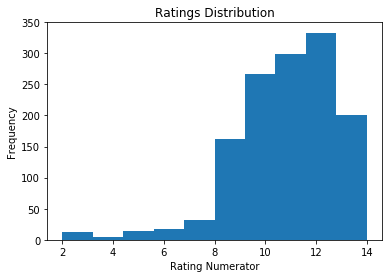

In [62]:
#plot the count of rating numerators between 2 and 75
plt.hist(df_master['rating_numerator'], range = (2, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

### The graph clearly shows that it is left skewed with peak at 12

In [63]:
#check outlinears
df_master[df_master.rating_numerator == 1776]

,tweet_id,tweet_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
577,749981277374128128,2016-07-04,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2693.0,5482.0


In [64]:
#check dogs with rating 2
df_master[df_master.rating_numerator == 2]

,tweet_id,tweet_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1049,678424312106393600,2015-12-20,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,...,0.759945,True,Toy_Poodle,0.101194,True,Shih-Tzu,0.056037,True,2770.0,5741.0
1110,674265582246694913,2015-12-08,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,None,...,0.998075,False,Ice_Lolly,0.000984,False,Leafhopper,0.000097,False,896.0,1699.0


In [65]:
#check dogs with rating 75
df_master[df_master.rating_numerator == 75]

,tweet_id,tweet_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
402,786709082849828864,2016-10-13,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,...,0.467321,True,Persian_Cat,0.122978,False,Chow,0.102654,True,6810.0,19789.0


In [66]:
#check dogs with rating 12
df_master[df_master.rating_numerator == 12]

,tweet_id,tweet_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4156.0,24912.0
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9411.0,40140.0
10,889638837579907072,2017-07-25,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,...,0.991650,True,Boxer,0.002129,True,Staffordshire_Bullterrier,0.001498,True,4548.0,27046.0
13,888917238123831296,2017-07-23,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,...,0.714719,True,Tibetan_Mastiff,0.120184,True,Labrador_Retriever,0.105506,True,4501.0,28948.0
16,888078434458587136,2017-07-20,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,...,0.995026,True,Pug,0.000932,True,Bull_Mastiff,0.000903,True,3485.0,21665.0
22,886366144734445568,2017-07-15,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,...,0.999201,True,Chihuahua,0.000361,True,Boston_Bull,0.000076,True,3196.0,21096.0
24,885984800019947520,2017-07-14,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,...,0.972494,True,Shih-Tzu,0.006630,True,Bernese_Mountain_Dog,0.006239,True,6810.0,32550.0
26,884925521741709313,2017-07-12,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,...,0.259916,True,American_Staffordshire_Terrier,0.198451,True,Staffordshire_Bullterrier,0.127725,True,18426.0,77188.0
29,884162670584377345,2017-07-09,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,...,0.707046,True,Malinois,0.199396,True,Norwegian_Elkhound,0.049148,True,2982.0,20291.0
30,883838122936631299,2017-07-09,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,https://twitter.com/dog_rates/status/883838122...,12,10,Noah,None,None,...,0.610946,True,Miniature_Pinscher,0.299603,True,Kelpie,0.063020,True,3439.0,21807.0


Text(0,0.5,'Likes')

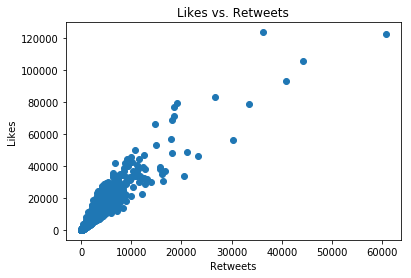

In [67]:
#create scatter plot between retweets and favorites
plt.scatter(df_master['retweet_count'], df_master['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

Text(0,0.5,'Likes')

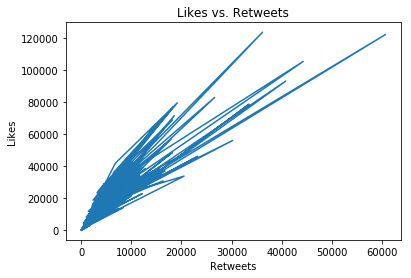

In [68]:
#create scatter plot between retweets and favorites
plt.plot(df_master['retweet_count'], df_master['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

### There is a psitive correlation between likes and retweets